In [21]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [22]:
fashion_mnist = keras.datasets.fashion_mnist

In [42]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [43]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [44]:
train_images.shape

(60000, 28, 28)

In [60]:
len(train_labels)

60000

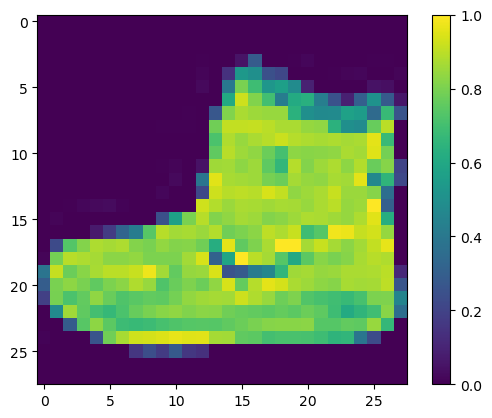

In [61]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [62]:
train_images = train_images / 255.0

test_images = test_images / 255.0

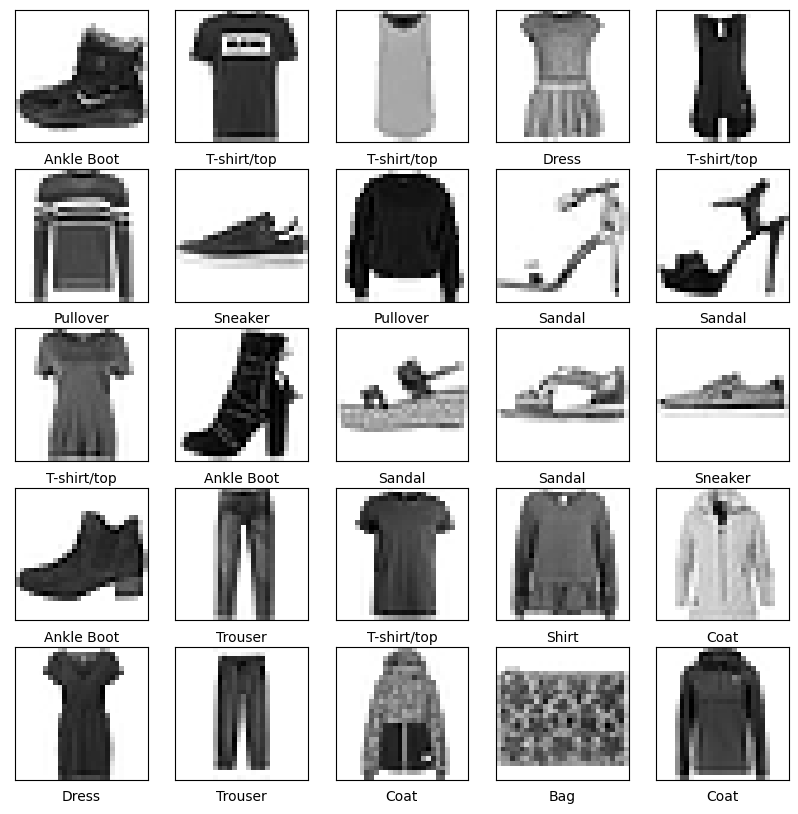

In [63]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [64]:
# setup the layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [65]:
model.compile(  
    loss="sparse_categorical_crossentropy")
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3424
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026
313/313 - 1s - loss: 2.3026 - 769ms/epoch - 2ms/step

Test accuracy: 2.30259108543396


In [66]:
probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([0.09984169, 0.1004139 , 0.10016476, 0.09902314, 0.10054189,
       0.10023269, 0.09922848, 0.10053572, 0.10039695, 0.09962077],
      dtype=float32)

In [67]:
# defined the plot image
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # defining the plot value array
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



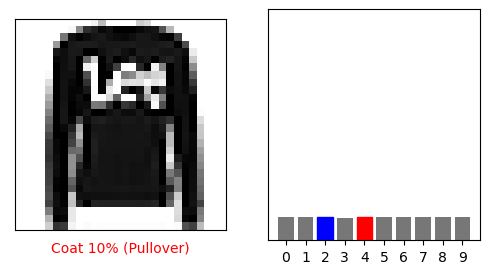

In [68]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

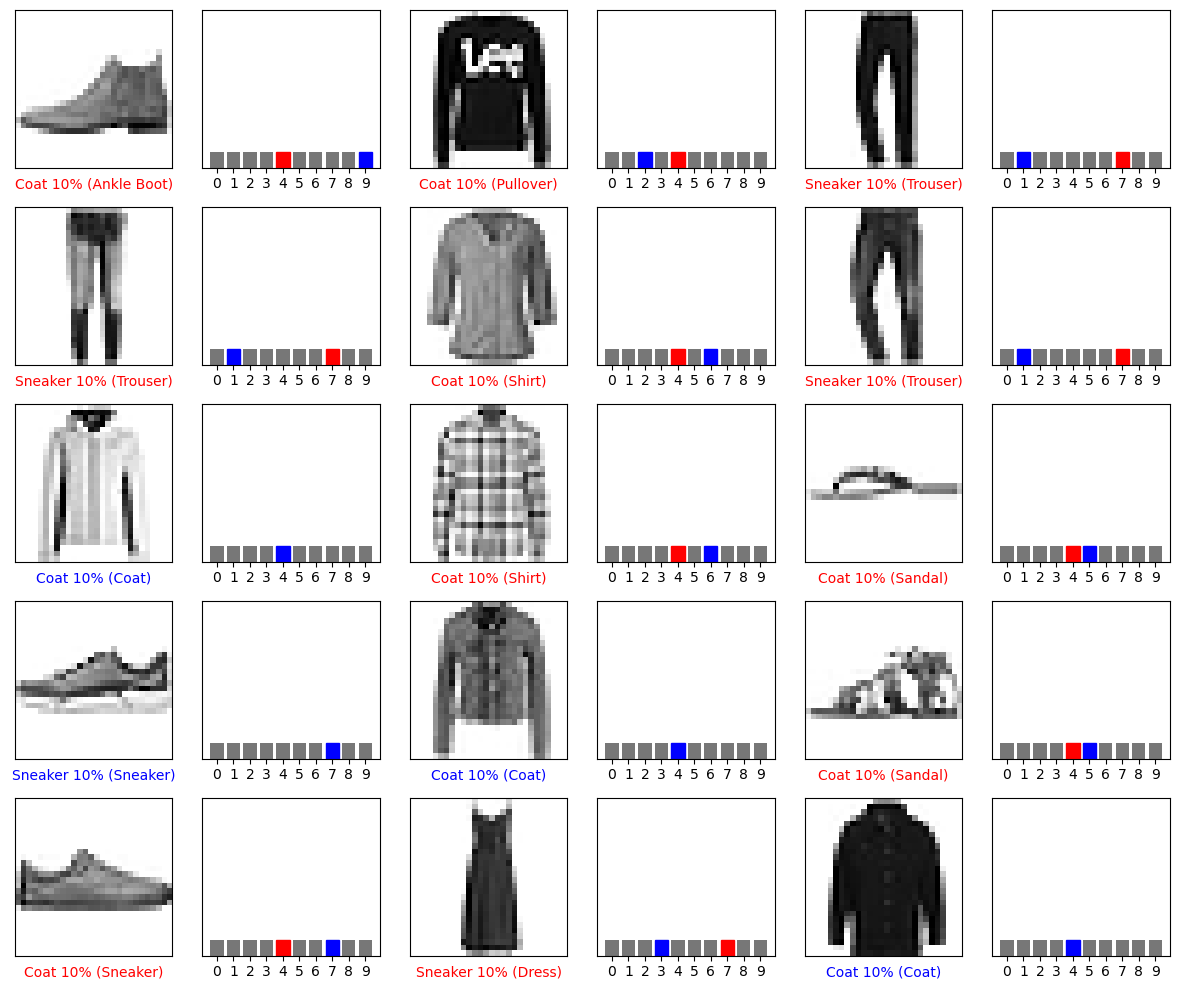

In [69]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()